In [1]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

master_array = []
speech = []

for filename in os.listdir('C:/Users/Meenakshi Kodati/Desktop/Courses/Python/ML Project 3/Data/Scripts'):
    f = open(("C:/Users/Meenakshi Kodati/Desktop/Courses/Python/ML Project 3/Data/Scripts/"+filename),"r")
    script = f.read()
    pattern = re.compile(r'\s(?=\w+(?=:))')
    result = re.split(pattern, script)

    for item in result:
        season = filename[0:2]
        episode = filename[2:4]
        split_line = item.split(':')
        try:
            character = split_line[0]
            speech1 = split_line[1]
            speech = speech1.split('\n')[0]
        except:
            pass
        master_array.append([season, episode, character, speech])

scripts = pd.DataFrame(master_array, columns = ['season', 'episode', 'character', 'speech'])

scripts['character']=scripts['character'].replace({'CHAN':'Chandler','CHANDLER':'Chandler','chandler':'Chandler','Chandlers':'Chandler',
                              'JOEY':'Joey',
                              'MNCA':'Monica','MONICA':'Monica','MOnica':'Monica',
                              'PHOE':'Phoebe','PHOEBE':'Phoebe',
                              'Racel':'Rachel','RACH':'Rachel','Rache':'Rachel','RACHEL':'Rachel','RAHCEL':'Rachel',
                              'ROSS':'Ross'
                            })

scripts = scripts[scripts.character != "by"]
scripts.head()

,season,episode,character,speech
0,01,01,The One Where Monica Gets a New Roomate (The P...,[]
4,01,01,Monica,There's nothing to tell! He's just some guy I...
5,01,01,Joey,"C'mon, you're going out with the guy! There's..."
6,01,01,Chandler,"All right Joey, be nice. So does he have a h..."
7,01,01,Phoebe,"Wait, does he eat chalk?"


In [3]:
list_of_characters = ["Chandler","Joey","Monica","Phoebe","Rachel","Ross"]

main_dataset = scripts[scripts.character.isin(list_of_characters)]
main_dataset.head()

,season,episode,character,speech
4,01,01,Monica,There's nothing to tell! He's just some guy I...
5,01,01,Joey,"C'mon, you're going out with the guy! There's..."
6,01,01,Chandler,"All right Joey, be nice. So does he have a h..."
7,01,01,Phoebe,"Wait, does he eat chalk?"
8,01,01,Phoebe,"Just, 'cause, I don't want her to go through ..."


In [4]:
main_most_lines = main_dataset.groupby('character')['speech'].count().sort_values(ascending = False)

Text(0.5, 1.0, 'Number of Lines for Each Main Character')

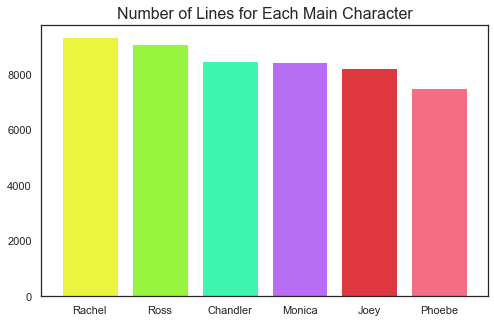

In [5]:
sns.set(style = 'white')

colors = ['#EAF53F','#97F53F','#3FF5B0','#B76EF3', '#E03841', '#F36E84']

fig, ax = plt.subplots(figsize = (8,5))

ax.bar(main_most_lines.index, main_most_lines.values, color = colors)

plt.title("Number of Lines for Each Main Character", fontsize = 16)


In [46]:
main_lines_by_season = pd.DataFrame(main_dataset.groupby(['season','character'])['speech'].count())
main_lines_by_season.head()

speech
season character        
01     Chandler      824
       Joey          647
       Monica        893
       Phoebe        646
       Rachel        856

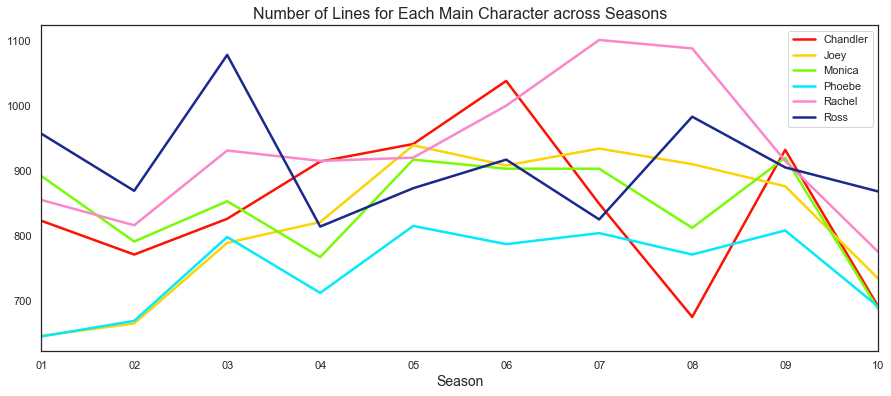

In [7]:
sns.set(style = 'white')

main_lines_by_season_plot = main_lines_by_season.unstack('character').loc[:,'speech']

colors = ['#FC1304','#FCD304','#78FC04','#04E9FC', '#FA87CB', '#1A298B']
main_lines_by_season_plot.plot(color = colors, figsize = (15,6), linewidth = 2.5)
plt.title("Number of Lines for Each Main Character across Seasons", fontsize = 16)
plt.xlabel("Season", fontsize = 14)
plt.legend(loc='upper right')

In [8]:
nicknames = [['Ross', 'Ross-A-Tron', 'Professor Geller'],
             ['Monica', 'Mon', 'Monana'],
             ['Rachel', 'Rach', 'Raquel'],
             ['Chandler', 'Chan', 'Toby'],
             ['Joey', 'Joe','Joseph'],
             ['Phoebe', 'Phoebes', 'Pheebs']]

In [9]:
speech_list = scripts['speech'].to_list()

full_script = ""

for e in speech_list:
    full_script = full_script+str(e)

In [10]:
name_ocurrence = []

for names in nicknames:
    ocurrence_total = 0
    for name in names:
        ocurrence_total += full_script.count(name)
    name_ocurrence.append([names[0],ocurrence_total])

main_popularity = pd.DataFrame(name_ocurrence, columns =["Character", "Mentions"]).sort_values('Mentions')


Text(0.5, 1.0, 'Number of times each main character was mentioned')

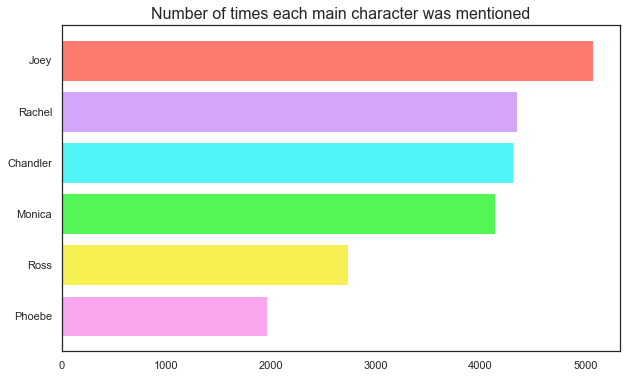

In [11]:
sns.set(style = 'white')

colors = ['#F9A6EE','#F7F052','#52F755','#52F5F7', '#D4A6F9', '#FD7B6E']

fig, ax = plt.subplots(figsize = (10,6))

ax.barh(main_popularity.Character, main_popularity.Mentions, color = colors)
plt.title("Number of times each main character was mentioned", fontsize = 16)

In [12]:
nickname_ocurrence = []

for names in nicknames:
    nn_ocurrence_total = 0
    for name in names:
        nn_ocurrence_total = full_script.count(name)
        nickname_ocurrence.append([name,nn_ocurrence_total])

nn_main_popularity = pd.DataFrame(nickname_ocurrence, columns =["NickName", "Mentions"]).sort_values('Mentions', ascending = False)

Text(0.5, 1.0, 'Number of occurrences of all names')

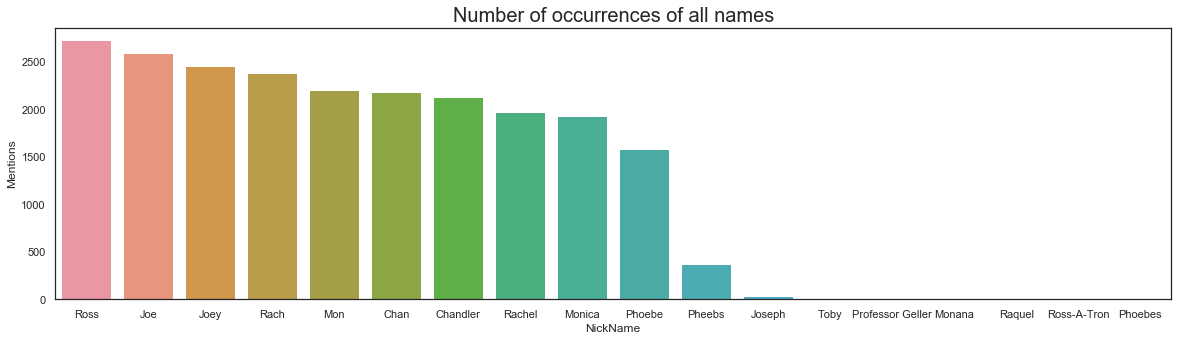

In [13]:
fig, ax = plt.subplots(figsize = (20, 5))
sns.barplot(nn_main_popularity.NickName, nn_main_popularity.Mentions)
plt.title("Number of occurrences of all names", fontsize = 20)

In [14]:
main_character_list = pd.DataFrame(main_dataset['character'].unique(), columns = ["Character"])
main_characters = main_character_list['Character'].to_list()

In [15]:
char_dialogues = []

for char in main_characters:
    char_speech = main_dataset[main_dataset.character == char]['speech'].to_list()
    
    char_speech_combined = ""
    
    for e in char_speech:
        char_speech_combined = char_speech_combined+str(e)
    
    char_dialogues.append([char, char_speech_combined])
    

In [16]:
char_name_ocurrence = []

for char, dialogues in char_dialogues:

    for names in nicknames:
        char_ocurrence_total = 0
        for name in names:
            char_ocurrence_total += dialogues.count(name)
        char_name_ocurrence.append([char, names[0],char_ocurrence_total])

In [17]:
char_relationship_strength = pd.DataFrame(char_name_ocurrence, columns = ["primary_char","about_char","mentions"])

In [18]:
char_relationship_strength.head()

,primary_char,about_char,mentions
0,Monica,Ross,285
1,Monica,Monica,271
2,Monica,Rachel,728
3,Monica,Chandler,1015
4,Monica,Joey,626


Text(0, 0.5, 'Number of Mentions')

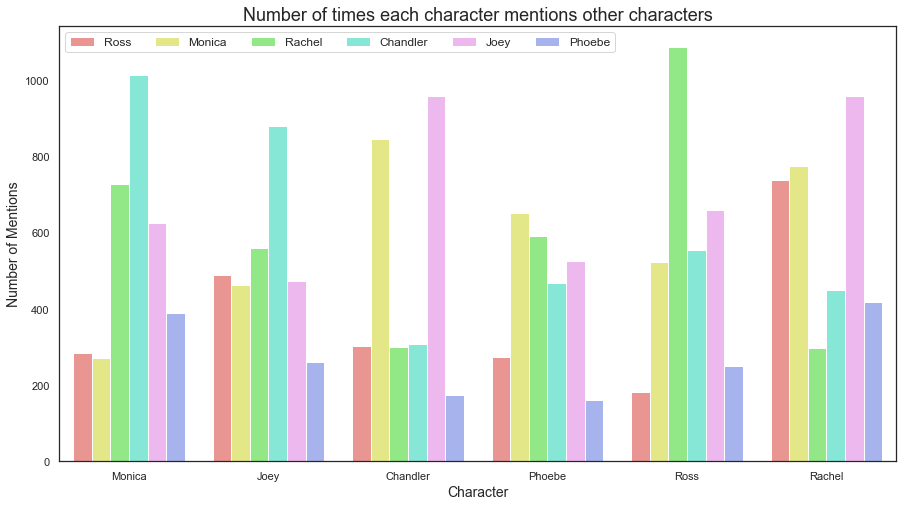

In [19]:
sns.set(style = 'white')

colors = ["#F88783", "#F3F777", "#85F777", "#77F7E2", "#F6AFF7", "#9CACF7"]

fig, ax = plt.subplots(figsize = (15, 8))
sns.barplot(x = 'primary_char', y = 'mentions', hue = 'about_char', data = char_relationship_strength, palette = colors)

plt.legend(loc=2, ncol = 6, prop={'size':12})
plt.title("Number of times each character mentions other characters", fontsize = 18)
plt.xlabel("Character", fontsize = 14)
plt.ylabel("Number of Mentions", fontsize = 14)

In [20]:
sentiment_data = main_dataset

In [44]:
sample = "I like : roses/lillies; water=sweater-90% of $1000"
clean = " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", sample).split())

In [45]:
clean

'I like roses lillies water sweater 90 of 1000'